INDICADORES DE ESPACIO PUBLICO

In [24]:
rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign,httr,jsonlite)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

rlang    (1.1.5 -> 1.1.6) [CRAN]
cli      (3.6.4 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.1 -> 4.0.0) [CRAN]


Installing 5 packages: rlang, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/ipdp_/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\ipdp_\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\ipdp_\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\ipdp_\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\ipdp_\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\ipdp_\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\ipdp_\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\ipdp_\AppData\Local\Temp\Rtmp6FPh6u\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────



Please download and install Rtools 4.4 from https://cran.r-project.org/bin/windows/Rtools/.



* checking for file 'C:\Users\ipdp_\AppData\Local\Temp\Rtmp6FPh6u\remotes6808333453d2\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [25]:
mujeres_seg<-openxlsx::read.xlsx("datos_espacio_publico_20250602.xlsx", sheet="Mujeres_seguras_caminar")%>%
  
rename(
    ciclo = periodo,                 # año
    Deseable = tendencia_deseable,   # línea deseable
    Inercial = tendencia_disruptivo, # escenario más bajo
    Transformador = tendencia_inercial # escenario más alto
  )
  # 🔸 Revisa que las columnas sean numéricas
mujeres_seg <- mujeres_seg %>%
  mutate(across(c(Deseable, Inercial, Transformador), as.numeric))
mujeres_seg

,ciclo,Transformador,Deseable,Inercial
,<dbl>,<dbl>,<dbl>,<dbl>
1,2021,21.13415,21.13415,21.13415
2,2022,23.46046,23.46046,23.46046
3,2023,24.79811,24.79811,24.79811
4,2024,31.17885,31.17885,31.17885
5,2025,30.73777,32.28153,32.64910
6,2026,30.30294,33.42322,34.18868
7,2027,29.87425,34.60528,35.80085
8,2028,29.45164,35.82915,37.48905
9,2029,29.03499,37.09630,39.25686


In [26]:
camina<-openxlsx::read.xlsx("datos_espacio_publico_20250602.xlsx",sheet="segur_parque_centrorecre")%>%
  
rename(
    ciclo = periodo,                 # año
    Deseable = tendencia_deseable,   # línea deseable
    Inercial = tendencia_disruptivo, # escenario más bajo
    Transformador = tendencia_inercial # escenario más alto
  )
camina

,ciclo,Transformador,Deseable,Inercial
,<dbl>,<dbl>,<dbl>,<dbl>
1,2020,36.03626,36.03626,36.03626
2,2021,35.64572,35.64572,35.64572
3,2022,40.53276,40.53276,40.53276
4,2023,46.84394,46.84394,46.84394
5,2024,43.51678,43.51678,43.51678
6,2025,42.75182,44.28173,44.66421
7,2026,42.00030,45.06014,45.84191
8,2027,41.26200,45.85223,47.05066
9,2028,40.53668,46.65824,48.29128


In [51]:
df_final <- mujeres_seg
ano_base <- 2024   # Ajusta si tu año base es distinto

# Separar observado vs futuro
obs <- df_final %>% 
filter(ciclo <= ano_base)

fut <- df_final %>% 
filter(ciclo >= ano_base)

GRAFICO: Porcentaje de mujeres que se sienten seguras al caminar solas por la noche en los alrededores de su vivienda en la Ciudad de México

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in g

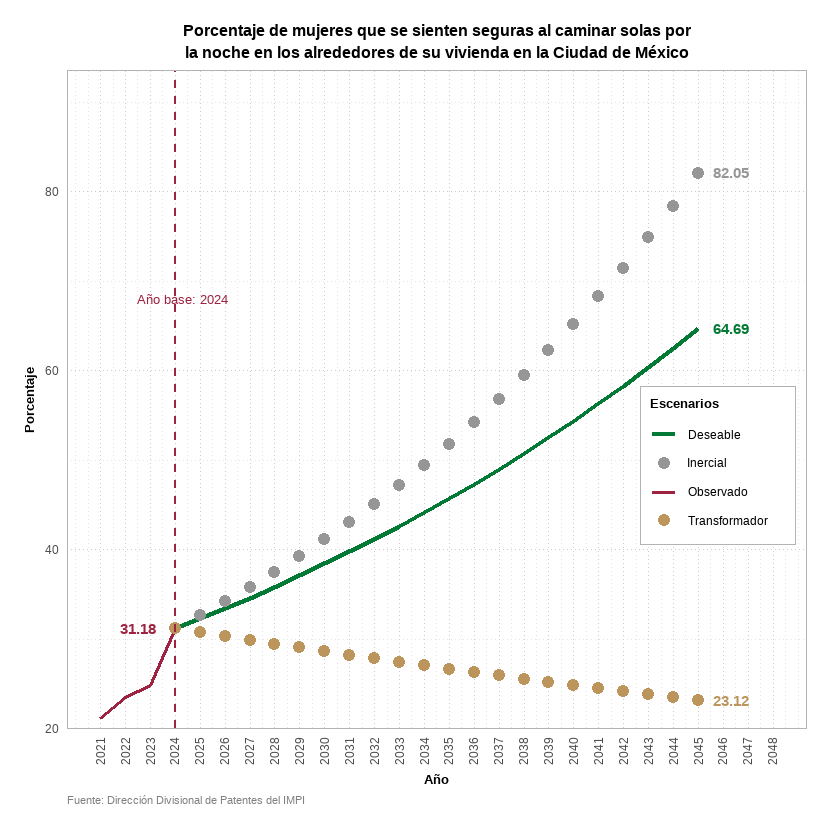

In [53]:
p <- ggplot() +
  
  # Observado
  geom_line(data = obs, aes(x = ciclo, y = Deseable, color = "Observado"), linewidth = 1.1) +
  
  # Deseable
  geom_line(data = fut, aes(x = ciclo, y = Deseable, color = "Deseable"), linewidth = 1.25) +
  
  # Escenarios futuros
  geom_point(data = fut, aes(x = ciclo, y = Inercial, color = "Inercial"), size = 3) +
  geom_point(data = fut, aes(x = ciclo, y = Transformador, color = "Transformador"), size = 3) +
  
  # Línea vertical del año base
  geom_vline(xintercept = ano_base, color = "#9F2241", linetype = "dashed", linewidth = 0.7) +
  annotate("text", x = ano_base + 0.3, y = max(df_final$Deseable) * 1.05,
           label = paste("Año base:", ano_base),
           color = "#9F2241", size = 3.3, family = "roboto") +
  
  # Etiqueta base
  annotate("text", x = ano_base - 1.5, y = df_final$Deseable[df_final$ciclo == ano_base],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == ano_base]),
           color = "#9F2241", size = 4, fontface = "bold", family = "roboto") +
  
  # Etiquetas finales flotantes
  annotate("text", x = 2046.3, y = df_final$Deseable[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == 2045]),
           color = "#027a35", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Inercial[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Inercial[df_final$ciclo == 2045]),
           color = "#969696", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Transformador[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Transformador[df_final$ciclo == 2045]),
           color = "#BC955C", size = 4, fontface = "bold", family = "roboto") +
  
  # Títulos y ejes
  labs(
    title = "Porcentaje de mujeres que se sienten seguras al caminar solas por\nla noche en los alrededores de su vivienda en la Ciudad de México",
    x = "Año",
    y = "Porcentaje",
    color = "Escenarios",
    caption = "Fuente: Dirección Divisional de Patentes del IMPI"
  ) +
  
  # Escalas
  scale_y_continuous(limits = c(20, 90), expand = expansion(mult = c(0, 0.05))) +
  scale_x_continuous(breaks = seq(2021, 2048, 1), limits = c(2021, 2048)) +
  
  # Colores
  scale_color_manual(values = c(
    "Observado" = "#9F2241",
    "Deseable" = "#027a35",
    "Inercial" = "#969696",
    "Transformador" = "#BC955C"
  )) +
  
  # Tema con cuadrícula más visible
  theme_minimal(base_family = "roboto") +
  theme(
    plot.title = element_text(face = "bold", size = 12, hjust = 0.5),
    axis.title = element_text(size = 10, face = "bold"),
    axis.text = element_text(size = 9),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    
    # Aquí el cambio principal: cuadrícula más visible
    panel.grid.major = element_line(color = "gray80", linetype = "dotted", linewidth = 0.5),
    panel.grid.minor = element_line(color = "gray90", linetype = "dotted", linewidth = 0.3),
    
    # Resto del formato
    plot.caption = element_text(hjust = 0, size = 8, color = "gray50"),
    legend.title = element_text(face = "bold", size = 10),
    legend.text = element_text(size = 9),
    legend.position = c(0.88, 0.4),
    legend.background = element_rect(fill = "white", color = "gray70", size = 0.3),
    legend.key = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "gray70", fill = NA, linewidth = 0.5),  # contorno
    plot.margin = margin(15, 20, 20, 15)
  )
  
print(p)

GRAFICO: Porcentaje de población de 18 años y más que dice experimentar seguridad en los parques o centros recreativos en la Ciudad de México

In [54]:
df_final <- camina # Renombramos 'camina' a 'df_final' para minimizar cambios
obs <- camina[camina$ciclo <= ano_base, ] # Asumimos que los datos 'observados' son hasta el año base
fut <- camina[camina$ciclo > ano_base, ]  # Asumimos que los datos 'futuros' son después del año base

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'roboto' not found, will use 'sans' instead"
Warning message in g

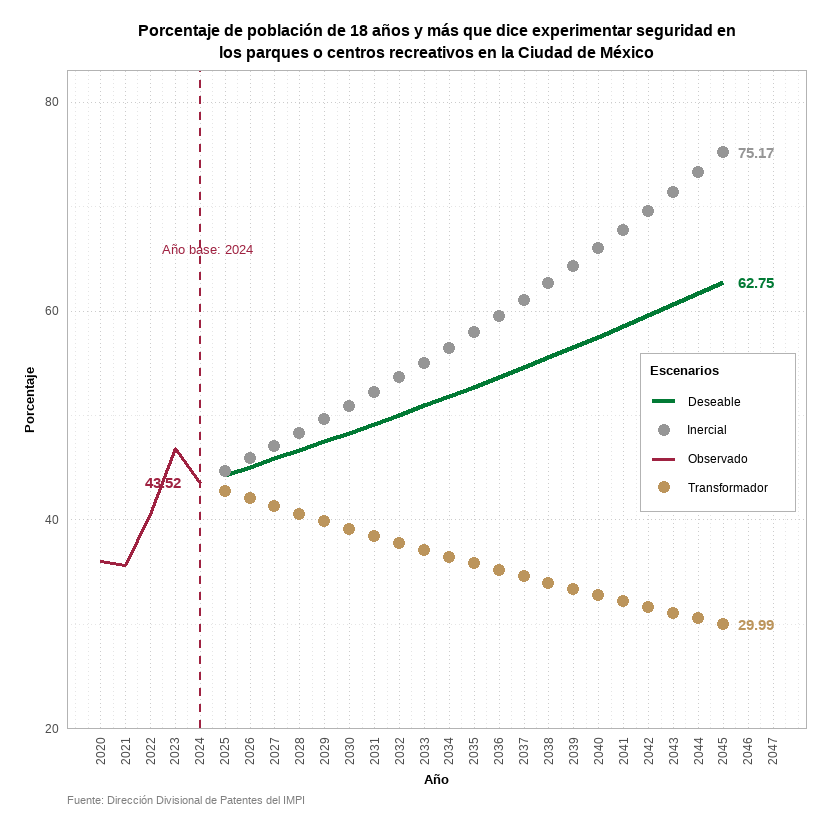

In [63]:
p <- ggplot() +
  
  # Observado
  geom_line(data = obs, aes(x = ciclo, y = Deseable, color = "Observado"), linewidth = 1.1) +
  
  # Deseable
  geom_line(data = fut, aes(x = ciclo, y = Deseable, color = "Deseable"), linewidth = 1.25) +
  
  # Escenarios futuros
  geom_point(data = fut, aes(x = ciclo, y = Inercial, color = "Inercial"), size = 3) +
  geom_point(data = fut, aes(x = ciclo, y = Transformador, color = "Transformador"), size = 3) +
  
  # Línea vertical del año base
  geom_vline(xintercept = ano_base, color = "#9F2241", linetype = "dashed", linewidth = 0.7) +
  annotate("text", x = ano_base + 0.3, y = max(df_final$Deseable) * 1.05,
           label = paste("Año base:", ano_base),
           color = "#9F2241", size = 3.3, family = "roboto") +
  
  # Etiqueta base
  annotate("text", x = ano_base - 1.5, y = df_final$Deseable[df_final$ciclo == ano_base],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == ano_base]),
           color = "#9F2241", size = 4, fontface = "bold", family = "roboto") +
  
  # Etiquetas finales flotantes (🔹 ahora con dos decimales)
  annotate("text", x = 2046.3, y = df_final$Deseable[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Deseable[df_final$ciclo == 2045]),
           color = "#027a35", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Inercial[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Inercial[df_final$ciclo == 2045]),
           color = "#969696", size = 4, fontface = "bold", family = "roboto") +
  annotate("text", x = 2046.3, y = df_final$Transformador[df_final$ciclo == 2045],
           label = sprintf("%.2f", df_final$Transformador[df_final$ciclo == 2045]),
           color = "#BC955C", size = 4, fontface = "bold", family = "roboto") +
  
  # Títulos y ejes
  labs(
    title = "Porcentaje de población de 18 años y más que dice experimentar seguridad en\nlos parques o centros recreativos en la Ciudad de México",
    x = "Año",
    y = "Porcentaje",
    color = "Escenarios",
    caption = "Fuente: Dirección Divisional de Patentes del IMPI"
  ) +
  
  # Escalas
  scale_y_continuous(limits = c(20, 80), expand = expansion(mult = c(0, 0.05))) +
  scale_x_continuous(breaks = seq(2020, 2047, 1), limits = c(2020, 2047)) +
  
  # Colores
  scale_color_manual(values = c(
    "Observado" = "#9F2241",
    "Deseable" = "#027a35",
    "Inercial" = "#969696",
    "Transformador" = "#BC955C"
  )) +
  
  # Tema con cuadrícula más visible
  theme_minimal(base_family = "roboto") +
  theme(
    plot.title = element_text(face = "bold", size = 12, hjust = 0.5),
    axis.title = element_text(size = 10, face = "bold"),
    axis.text = element_text(size = 9),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    panel.grid.major = element_line(color = "gray80", linetype = "dotted", linewidth = 0.5),
    panel.grid.minor = element_line(color = "gray90", linetype = "dotted", linewidth = 0.3),
    plot.caption = element_text(hjust = 0, size = 8, color = "gray50"),
    legend.title = element_text(face = "bold", size = 10),
    legend.text = element_text(size = 9),
    legend.position = c(0.88, 0.45),
    legend.background = element_rect(fill = "white", color = "gray70", size = 0.3),
    legend.key = element_rect(fill = "white", color = NA),
    panel.border = element_rect(color = "gray70", fill = NA, linewidth = 0.5),
    plot.margin = margin(15, 20, 20, 15)
  )

  print(p)